In [1]:
import time
import pandas as pd
import numpy as np
from copy import deepcopy
import sys
import os
import csv
from itertools import cycle
import warnings
from itertools import cycle
from scipy import sparse
import matplotlib.pyplot as plt
# Suppress all warnings
warnings.filterwarnings("ignore")
# warnings.resetwarnings() # To change it back (optional)

sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")

from scripts.similarity_scores import get_scores,clustering_method_values
from scripts.nets_and_embeddings import *

In [2]:
#net_n~
net_file = "/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/net_n~10000_k~10_tau~3_tau2~1_minc~50_mu~0.10_sample~0.npz"
#node_n~
node_file = "/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/node_n~10000_k~10_tau~3_tau2~1_minc~50_mu~0.10_sample~0.npz"
#n~
emb_file = "/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~0.10_sample~0_model_name~node2vec_window_length~10_dim~64.npz"

net = sparse.load_npz(net_file)
node_table = pd.read_csv(node_file)
node_table = node_table.rename(columns={'membership': 'community_id'})
emb = np.load(emb_file)["emb"]


In [11]:
mu_values = np.round(np.arange(0.10, 1.05, 0.05),decimals=2)
samples = np.arange(0,10)

for mu in mu_values:
    for sample in samples:
        print(mu,sample)
        net_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/net_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        node_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/node_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #n~
        #emb_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}_model_name~node2vec_window_length~10_dim~64.npz"

        net = sparse.load_npz(net_file)
        node_table = pd.read_csv(node_file)
        node_table = node_table.rename(columns={'membership': 'community_id'})
        #emb = np.load(emb_file)["emb"]

0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.1 5
0.1 6
0.1 7
0.1 8
0.1 9
0.15 0
0.15 1
0.15 2
0.15 3
0.15 4
0.15 5
0.15 6
0.15 7
0.15 8
0.15 9
0.2 0
0.2 1
0.2 2
0.2 3
0.2 4
0.2 5
0.2 6
0.2 7
0.2 8
0.2 9
0.25 0
0.25 1
0.25 2
0.25 3
0.25 4
0.25 5
0.25 6
0.25 7
0.25 8
0.25 9
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.3 5
0.3 6
0.3 7
0.3 8
0.3 9
0.35 0
0.35 1
0.35 2
0.35 3
0.35 4
0.35 5
0.35 6
0.35 7
0.35 8
0.35 9
0.4 0
0.4 1
0.4 2
0.4 3
0.4 4
0.4 5
0.4 6
0.4 7
0.4 8
0.4 9
0.45 0
0.45 1
0.45 2
0.45 3
0.45 4
0.45 5
0.45 6
0.45 7
0.45 8
0.45 9
0.5 0
0.5 1
0.5 2
0.5 3
0.5 4
0.5 5
0.5 6
0.5 7
0.5 8
0.5 9
0.55 0
0.55 1
0.55 2
0.55 3
0.55 4
0.55 5
0.55 6
0.55 7
0.55 8
0.55 9
0.6 0
0.6 1
0.6 2
0.6 3
0.6 4
0.6 5
0.6 6
0.6 7
0.6 8
0.6 9
0.65 0
0.65 1
0.65 2
0.65 3
0.65 4
0.65 5
0.65 6
0.65 7
0.65 8
0.65 9
0.7 0
0.7 1
0.7 2
0.7 3
0.7 4
0.7 5
0.7 6
0.7 7
0.7 8
0.7 9
0.75 0
0.75 1
0.75 2
0.75 3
0.75 4
0.75 5
0.75 6
0.75 7
0.75 8
0.75 9
0.8 0
0.8 1
0.8 2
0.8 3
0.8 4
0.8 5
0.8 6
0.8 7
0.8 8
0.8 9
0.85 0
0.85 1
0.85 2
0.85 3
0.

In [5]:
# Node2vec uses dot similarity metric (|u||v|cos(theta))
# Kmeans uses euclidean distance (sqrt({ux - vx}**2 + {uy - vy}**2))
# Our proposed algorithm uses dot similarity like node2vec

# How different do the results come if we streamline this metric?
# What if we just change kmeans from euclidean to dot? 
# Does that defeat the purpose of this algo?

In [10]:
mu_values = np.round(np.arange(0.10, 1.05, 0.05),decimals=2)
samples = np.arange(0,3)
#samples = np.arange(0,10) # use this to create embeddings and then get curves
score_keys=["kmeans","proposed"]
device_names = [f"cuda:{i}" for i in [0,1,2,3]]  # ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3']

# We can snakemake this easily._
kmeans_curve = {}
proposed_curve = {}

for mu in mu_values:
    start_time = time.perf_counter()
    scores_kmeans = []
    scores_proposed = []
    kmeans_curve[mu] = []
    proposed_curve[mu]=[]

    for sample, device_name in zip(samples,cycle(device_names)):
        start_time_run = time.perf_counter()
        #net_n~
        #net_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/net_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #node_n~
        node_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/node_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #n~
        emb_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}_model_name~node2vec_window_length~10_dim~64.npz"

        #net = sparse.load_npz(net_file)
        node_table = pd.read_csv(node_file)
        node_table = node_table.rename(columns={'membership': 'community_id'})
        emb = np.load(emb_file)["emb"]
        scores = (clustering_method_values(None, node_table, emb, score_keys, device_name))

        scores_kmeans.append(scores['kmeans'])
        scores_proposed.append(scores['proposed'])
        
        print(f"Sample: {sample} in ",time.perf_counter()- start_time_run)
    print(f"mu: {mu} in ", time.perf_counter()- start_time)
    proposed_curve[mu].append(scores_proposed)
    kmeans_curve[mu].append(scores_kmeans)

Sample: 0 in  7.380303110927343
Sample: 1 in  6.730002645403147
Sample: 2 in  6.93785460293293
mu: 0.1 in  21.048381861299276
Sample: 0 in  7.281576037406921
Sample: 1 in  6.743983931839466
Sample: 2 in  6.863618448376656
mu: 0.15 in  20.889423698186874
Sample: 0 in  6.742920730262995
Sample: 1 in  7.233495771884918
Sample: 2 in  7.085608672350645
mu: 0.2 in  21.062245715409517
Sample: 0 in  7.046312116086483
Sample: 1 in  8.546152796596289
Sample: 2 in  7.159390524029732
mu: 0.25 in  22.75205573812127
Sample: 0 in  9.051907446235418
Sample: 1 in  8.433708421885967
Sample: 2 in  8.369203895330429
mu: 0.3 in  25.85504151880741
Sample: 0 in  10.966351758688688
Sample: 1 in  10.346252031624317
Sample: 2 in  9.581769604235888
mu: 0.35 in  30.894585378468037
Sample: 0 in  13.803001023828983
Sample: 1 in  14.89960678294301
Sample: 2 in  16.335301335901022
mu: 0.4 in  45.03811429440975
Sample: 0 in  18.869510505348444
Sample: 1 in  19.766861617565155
Sample: 2 in  15.683569133281708
mu: 0.45 

In [15]:
proposed_curve

{0.1: [0.9911158100759764, 0.99899173733894, 0.9890827407592244],
 0.15: [0.9964545676240777, 0.9954249251800459, 0.9942843743297342],
 0.2: [0.9813107172452334, 0.9726433521201681, 0.9769356006977264],
 0.25: [0.9701754366320952, 0.9515796155701174, 0.9758274392840749],
 0.3: [0.9137335441532639, 0.9303432171026014, 0.917922607615509],
 0.35: [0.8723363978458984, 0.8694611274357668, 0.8997484763543578],
 0.4: [0.8375348572297783, 0.8130680893816759, 0.8319611591701898],
 0.45: [0.6458214120273413, 0.7076484400508883, 0.7429867214922738],
 0.5: [0.5311694263444217, 0.4339286255005286, 0.48711117372400714],
 0.55: [0.31637146773203234, 0.349050564796278, 0.3231469905747328],
 0.6: [0.13359550718325583, 0.14516702795695266, 0.12469114644877992],
 0.65: [0.03583933661118059, 0.032192897958245606, 0.029497075515642283],
 0.7: [0.014807752462034952, 0.016853824854565963, 0.014099203761615355],
 0.75: [0.011177018169361685, 0.010917808695257459, 0.011038776662815622],
 0.8: [0.00984119702681

In [16]:
kmeans_curve

{0.1: [0.9627155786507738, 0.9511047949797368, 0.9487214629436206],
 0.15: [0.9290829524456693, 0.9396985259385389, 0.9490375244406694],
 0.2: [0.9324730708467714, 0.9038004379912885, 0.9282586055410741],
 0.25: [0.9361481489696184, 0.9238631379183281, 0.9408474966791643],
 0.3: [0.9300221543370392, 0.9189866766126963, 0.9629664448721712],
 0.35: [0.8903538152596097, 0.9338118715011897, 0.945740369121951],
 0.4: [0.9083186831521304, 0.9355889857749616, 0.9438157608645801],
 0.45: [0.9398673554509696, 0.8956188107796511, 0.9011645936392281],
 0.5: [0.8885214560319938, 0.8757147021658386, 0.868542491525863],
 0.55: [0.7476848194436218, 0.7319550688174956, 0.7721925906019077],
 0.6: [0.4885171532164063, 0.49293337702828743, 0.5185747784293475],
 0.65: [0.091166769012811, 0.0892619972294351, 0.07590794931640193],
 0.7: [0.020914207547888884, 0.03005950817571956, 0.018958111558418367],
 0.75: [0.012090322020238742, 0.011710063319077878, 0.011314045991338718],
 0.8: [0.008916303348764502, 0.

Text(0.5, 1.0, 'Runs: 3 | Nodes: 10000 | $\\tau$: 3.0 | $<k>$: 10')

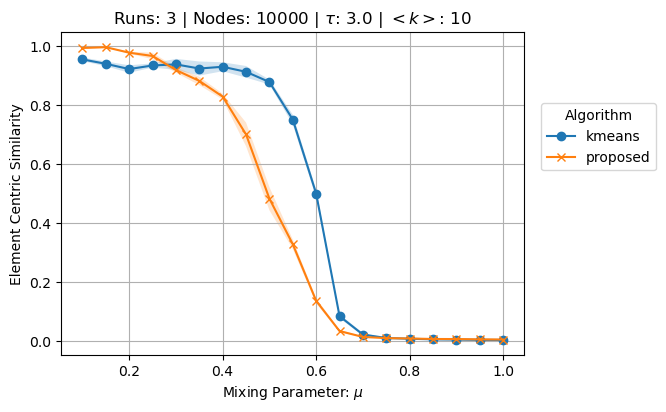

In [12]:
# plt.plot(mu_values, l1,'-x',label='kmeans')
# plt.plot(mu_values, l2,'-o',label = 'proposed')

plt.figure(figsize=(7,4))

l1=[]
l2=[]
l1_std=[]
l2_std=[]
for i in mu_values:
    l1.append(np.mean(kmeans_curve[i]))
    l2.append(np.mean(proposed_curve[i]))
    l1_std.append(np.std(kmeans_curve[i]))
    l2_std.append(np.std(proposed_curve[i]))
    
l1 = np.array(l1)
l2 = np.array(l2)
l1_std = np.array(l1_std)
l2_std = np.array(l2_std)
plt.plot(mu_values,l1, '-o',label="kmeans")
plt.plot(mu_values,l2, '-x',label="proposed")
plt.fill_between(mu_values, l1 - l1_std,l1 + l1_std, alpha=0.2)
plt.fill_between(mu_values, l2 - l2_std,l2 + l2_std, alpha=0.2)

plt.xlabel(r'Mixing Parameter: $\mu$')
plt.ylabel('Element Centric Similarity')
plt.legend(title="Algorithm", loc='upper right', bbox_to_anchor=(1.3, 0.8))
plt.grid(True)
plt.tight_layout()

plt.title(rf'Runs: {3} | Nodes: {10000} | $\tau$: {3.0} | $<k>$: {10}')

In [9]:
mu_values = np.round(np.arange(0.10, 1.05, 0.05),decimals=2)
np.set_printoptions(formatter={'float': '{:0.2f}'.format})
mu_values

array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60,
       0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])

In [9]:
# Will use sadamori nets to create embeddings and cluster
# and compare with sadamori embeddings

In [14]:
import time
import pandas as pd
import numpy as np
from copy import deepcopy
import sys
import os
import csv
from itertools import cycle
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# warnings.resetwarnings() # To change it back (optional)

sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")

from scripts.similarity_scores import get_scores

from scripts.nets_and_embeddings import create_embedding



def process_and_save_result(run_no, mu, path_name, score_keys, device_name, emb_params, params,csv_file_path):
    start_time = time.perf_counter()

    if not os.path.isdir(f"{path_name}/Run_{run_no}/"):
        os.mkdir(f"{path_name}/Run_{run_no}/")

    params['mu'] = mu
    result_run_mu = get_scores(params, emb_params, score_keys, f"{path_name}/Run_{run_no}/", device_name)
    
    with open(csv_file_path, 'a', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow([run_no, mu] + [result_run_mu[key] for key in score_keys])
        
    elapsed_time = time.perf_counter() - start_time
    
    print(run_no,mu,elapsed_time)
    return run_no, mu, result_run_mu

def save_accumulated_results(results, pathname, score_keys):
    for run_no, mu, result_run_mu in results:
        df = pd.DataFrame.from_dict(result_run_mu, orient='index')
        df.reset_index(inplace=True)
        df.columns = ['mu'] + list(df.columns[1:])
        df.to_csv(f"{pathname}/Run_{run_no}/mu_{mu:.2f}_change.csv", index=False)

accumulator = []  # List to accumulate results for each run and mu


num_cores = 10

path_name = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori"

#################### End of Params #################

csv_file_path = path_name + "/result_stream.csv"

print("Hello, you can find results at:\n",path_name)
samples = np.arange(3x,10)

score_keys=["kmeans","proposed"]
device_names = [f"cuda:{i}" for i in [0,1,2,3]]  # ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3']

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['run_no', 'mu'] + score_keys)

for sample in samples:
    start_time = time.perf_counter()

    for mu, device_name in zip(mu_values, cycle(device_names)):
        start_time_run = time.perf_counter()
        #net_n~
        net_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/net_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #node_n~
        node_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/node_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #n~
        #emb_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}_model_name~node2vec_window_length~10_dim~64.npz"

        net = sparse.load_npz(net_file)
        
        node_table = pd.read_csv(node_file)
        node_table = node_table.rename(columns={'membership': 'community_id'})

        emb = create_embedding(net)

        scores = (clustering_method_values(net, node_table, emb, score_keys, device_name))

        with open(csv_file_path, 'a', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow([sample, mu] + [scores[key] for key in score_keys])
        print(f"Mu {mu}: ", time.perf_counter() - start_time_run)
    print(f"Run took: {time.perf_counter() - start_time}, avg time per mu_val: {(time.perf_counter() - start_time)/len(mu_values)}")

Hello, you can find results at:
 /nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori
Mu 0.1:  31.012204114347696
Mu 0.15:  30.30010848864913
Mu 0.2:  30.885719280689955
Mu 0.25:  30.66623517125845
Mu 0.3:  33.228436678647995
Mu 0.35:  35.66565416380763
Mu 0.4:  34.788884077221155
Mu 0.45:  40.254847694188356
Mu 0.5:  49.91839177161455
Mu 0.55:  57.03386960923672
Mu 0.6:  75.95095815509558
Mu 0.65:  85.27342456951737
Mu 0.7:  82.00836440548301
Mu 0.75:  70.48645643889904
Mu 0.8:  92.88477922976017
Mu 0.85:  82.79345120489597
Mu 0.9:  76.033348005265
Mu 0.95:  77.46554256230593
Mu 1.0:  69.07103342190385
Run took: 1085.7233084775507, avg time per mu_val: 57.14333229649224
Mu 0.1:  29.84336719289422
Mu 0.15:  31.009137090295553
Mu 0.2:  30.962155748158693
Mu 0.25:  32.420716017484665
Mu 0.3:  32.837496019899845
Mu 0.35:  35.96922458335757
Mu 0.4:  36.19459616020322
Mu 0.45:  45.610328029841185
Mu 0.5:  54.850852496922016
Mu 0.55:  61.065089128911495
Mu 0.6:  68.37601600214839
Mu 0.65:  

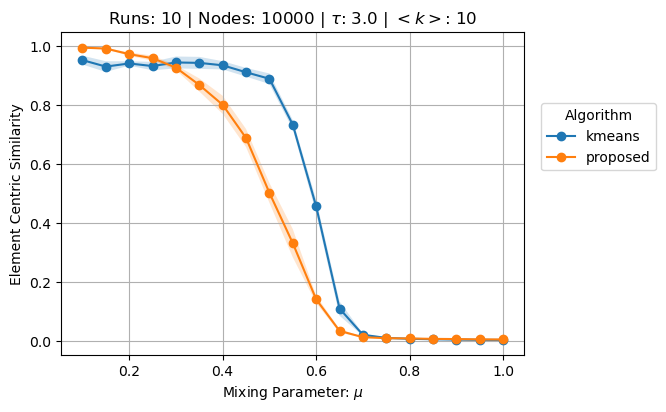

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

csv_file_path = "/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/result_stream.csv"
result_df = pd.read_csv(csv_file_path)
df_grouped = result_df.groupby('mu').agg(['mean', 'std'])
plt.figure(figsize=(7,4))

for column in df_grouped.columns.levels[0][1:]:
    
    mean_values = df_grouped[column]['mean']
    std_values = df_grouped[column]['std']
    
    plt.plot(mean_values.index, mean_values, '-o',label=column)
    plt.fill_between(mean_values.index, mean_values - std_values, mean_values + std_values, alpha=0.2)

plt.xlabel(r'Mixing Parameter: $\mu$')
plt.ylabel('Element Centric Similarity')
plt.legend(title="Algorithm", loc='upper right', bbox_to_anchor=(1.3, 0.8))
plt.grid(True)
plt.tight_layout()

plt.title(rf'Runs: {10} | Nodes: {10000} | $\tau$: {3.0} | $<k>$: {10}')


# Save the figure

# Show the plot
plt.show()